In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# SIN EMBARGO, ESTUDIANDO LA LEY DEL AGUA, VEMOS QUE PARA CADA UNO DE NUESTROS COMPONENTES HAY UN UMBRAL MINIMO, POR LO 
# QUE SOLO CON LAS FEATURES, SIEMPRE Y CUANDO UNA ESTE POR ENCIMA DE SU UMBRAL SEGURO,
# PODRIAMOS SABER CON UN ALGORITMO SENCILLO SI EL AGUA ES SEGURA O NO.


Los umbrales máximos comunes, basados en estándares internacionales y regulaciones de algunos países:

Aluminium (Aluminio): El límite máximo permitido puede variar, pero típicamente está en el rango de 2 - 3 mg/L.
Ammonia (Amoníaco): El límite máximo permitido suele estar alrededor de 20-30 mg/L.
Arsenic (Arsénico): El límite máximo permitido puede ser tan bajo como 0.01 mg/L.
Barium (Bario): El límite máximo permitido puede ser aproximadamente 1 - 2.0 mg/L.
Cadmium (Cadmio): El límite máximo permitido puede ser tan bajo como 0.003 - 0.005 mg/L.
Chloramine (Cloramina): El límite máximo permitido puede variar, pero suele estar en el rango de 3 - 4 mg/L.
Chromium (Cromo): El límite máximo permitido para el cromo hexavalente suele ser alrededor de 0.05 - 0.1 mg/L.
Copper (Cobre): El límite máximo permitido suele ser alrededor de 1.0 - 1.3 mg/L.
Flouride (Fluoruro): El límite máximo permitido para la fluoración del agua suele ser alrededor de 1.0 - 1.5 mg/L.
Bacteria y Viruses (Bacterias y Virus): El agua potable debe estar libre de bacterias y virus patógenos.
Lead (Plomo): El límite máximo permitido suele ser muy bajo, alrededor de 0.01 - 0.015 mg/L.
Nitrates (Nitratos): El límite máximo permitido suele ser alrededor de 10 mg/L.
Nitrites (Nitritos): El límite máximo permitido suele ser alrededor de 1 mg/L.
Mercury (Mercurio): El límite máximo permitido suele ser muy bajo, alrededor de 0.001 - 0.002 mg/L.
Perchlorate (Perclorato): El límite máximo permitido puede variar, pero típicamente está en el rango de 6 - 56 µg/L.
Radium (Radio): El límite máximo permitido suele ser alrededor de 5 - 10 pCi/L.
Selenium (Selenio): El límite máximo permitido suele ser alrededor de 0.1 - 0.5 mg/L.
Silver (Plata): El límite máximo permitido puede variar, pero suele estar en el rango de 0.05 - 0.1 mg/L.
Uranium (Uranio): El límite máximo permitido suele ser alrededor de 0.2 - 0.3 mg/L.

In [3]:
calidad_no_sup = pd.read_csv('data/waterQuality1.csv')
calidad_no_sup

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
calidad_no_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [5]:
calidad_no_sup.ammonia.value_counts()

0.17     13
0.12     13
0.37     13
13.74    12
0.75     11
         ..
22.37     1
6.78      1
16.4      1
24.46     1
10        1
Name: ammonia, Length: 2564, dtype: int64

In [6]:
calidad_no_sup['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [7]:
# vamos a visualizar solo los NO SEGUROS, para ver si alguno de los componentes esta por encima del nivel 
# no permitido para considerar un agua PERJUDICIAL PARA LA SALUD
agua_no_segura = calidad_no_sup[calidad_no_sup['is_safe'] == '1']

In [8]:
agua_no_segura

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [9]:
# Lo más util, para ver si los datos se pasan de sus umbrales, es crear una columna auxiliar para ver si cada observacion 
# es segura o no segun las condiciones. Lo haremos EN UNA COPIA, PARA EVITAR MODIFICACIONES INNECESARIAS EN EL DATASET ORIGINAL
calidad_condiciones = calidad_no_sup.copy()

In [10]:
calidad_condiciones.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [11]:
calidad_condiciones.info()
# vemos que tanto la columna ammonia como la columna is_safe son objetos.
# habria que tratarlas y cambiarlas a numerica si es necesario.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [12]:
# Cambiamos ammonia a numerica
calidad_condiciones['ammonia'] = calidad_condiciones['ammonia'].apply(pd.to_numeric, errors='coerce') # los que aparecen como !#num, los pasamos a nan

In [13]:
calidad_condiciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [14]:
# y tratamos la columna safe como en el supervisado, RECORDEMOS QUE EL 0 ES AGUA NO SEGURA Y EL 1 AGUA SEGURA
# primero, eliminamos los #NUM!
calidad_condiciones['is_safe'] = pd.to_numeric(calidad_condiciones['is_safe'], errors='coerce') # LOS CAMBIAMOS A NAN PARA ELIMINARLOS
calidad_condiciones_final = calidad_condiciones.dropna(subset=['is_safe'])

In [15]:
calidad_condiciones_final.info() # y ya tenemos todos los datos a numerico

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [16]:
# Ya podemos introducir las condiciones para los umbrales
condiciones = {'aluminium': 2.8,
    'ammonia': 32.5,
    'arsenic': 0.01,
    'barium': 2,
    'cadmium': 0.005,
    'chloramine': 4,
    'chromium': 0.1,
    'copper': 1.3,
    'flouride': 1.5,
    'bacteria': 0,
    'viruses': 0,
    'lead': 0.015,
    'nitrates': 10,
    'nitrites': 1,
    'mercury': 0.002,
    'perchlorate': 56,
    'radium': 5,
    'selenium': 0.5,
    'silver': 0.1,
    'uranium': 0.3}

In [17]:
# Verificar si cada sustancia cumple con las condiciones y asignar el resultado a una nueva columna
for sustancia, limite in condiciones.items():
    calidad_condiciones_final[f'{sustancia}_safe'] = calidad_condiciones_final[sustancia] <= limite
    
calidad_condiciones_final['is_safe'] = calidad_condiciones_final[[f'{sustancia}_safe' for sustancia in condiciones.keys()]].all(axis=1)
calidad_condiciones_final.drop(columns=[f'{sustancia}_safe' for sustancia in condiciones.keys()], inplace=True)# Eliminar las columnas auxiliares creadas

C:\Users\Picar\AppData\Local\Temp\ipykernel_26724\2780370507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_condiciones_final[f'{sustancia}_safe'] = calidad_condiciones_final[sustancia] <= limite
C:\Users\Picar\AppData\Local\Temp\ipykernel_26724\2780370507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_condiciones_final[f'{sustancia}_safe'] = calidad_condiciones_final[sustancia] <= limite
C:\Users\Picar\AppData\Local\Temp\ipykernel_26724\2780370507.py:3: SettingWithCopyWarning: 
A 

In [18]:
ejemplo_NO_SEGURA = calidad_condiciones_final[calidad_condiciones_final['is_safe'] == False]
ejemplo_NO_SEGURA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,False
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,False
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,False
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,False
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,0.02,5.24,0.05,0.77,0.020,0.57,0.04,0.03,0.15,0.00,...,0.085,19.41,1.00,0.001,1.68,3.55,0.05,0.07,0.07,False
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,False
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,False
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,False


In [19]:
ejemplo = calidad_condiciones_final[calidad_condiciones_final['is_safe'] == True]
ejemplo
# Vemos que TRAS NUESTRO FILTRO DE SUSTANCIAS, AGUA SEGURA SOLO SE CONSIDERA UNO DE TODOS LOS REGISTROS a pesar 
# de que habia solo 912 registros de los casi 8000 que si  se consideraban seguros!!
# esto quiere decir que hay muchos registros considerados seguros QUE POR LEGISLACION NO LO SERIAN

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7997,0.01,10.0,0.01,2.0,0.0,2.0,0.0,0.09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [20]:
# ¿que quiere decir? que deberia estudiar con aprendizaje no supervisado mis datos para ver como se reunen las sustancias, hacer
# PCA PARA REDUCIR LA DIMENSIONALIDAD (recordemos que en el supervisado vimos que la mitad de los contaminantes no se tenian
# en consideracion para ningun modelo), hacer clusters y ver que otro tipo de pruebas podria hacer para obtener datos correctos y poder concretar 
# con las minimas pruebas posibles si el agua es segura o no.

In [23]:
# Me he servido de otro dataset sobre la potabilidad del agua, para obtener mas datos para mi aprendizaje supervisado para mis conclusiones
# sobre que determina la potabilidad del agua, que sea segura o no
agua_potable = pd.read_csv('data/water_potability.csv')

In [24]:
agua_potable.info() # Tengo nulos en las columnas ph, sulfatos y Trihalomethanes. Dado que utilizare este dataset 
# como auxiliar, prefiero eliminar los nulos y quedarme solo con los registros completos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
agua_potable_sinnan = agua_potable.dropna()

In [26]:
agua_potable_sinnan.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Y LAS COLUMNAS DE ESTE DATASET REPRESENTAN
pH: El pH es una medida de la acidez o alcalinidad del agua. Se refiere a la concentración de iones de hidrógeno en el agua. El pH se mide en una escala de 0 a 14, donde 7 es neutro. Valores por debajo de 7 indican acidez, y valores por encima de 7 indican alcalinidad.

Hardness (Dureza): La dureza del agua se refiere a la concentración de minerales disueltos, especialmente calcio y magnesio. Una alta dureza del agua puede causar problemas como la formación de depósitos de cal en tuberías y electrodomésticos.

Solids (Sólidos): Esta columna indica la concentración total de sólidos disueltos en el agua, medida en miligramos por litro (mg/L) o partes por millón (ppm). Los sólidos disueltos pueden incluir minerales, sales, metales y otros compuestos disueltos en el agua.

Chloramines (Cloraminas): Las cloraminas son compuestos químicos formados por la reacción del cloro con amoníaco o compuestos de nitrógeno. Se utilizan comúnmente como desinfectantes en el tratamiento del agua potable para eliminar bacterias y otros microorganismos.

Sulfate (Sulfato): El sulfato es un anión común en el agua que puede provenir de fuentes naturales como minerales disueltos o contaminantes antropogénicos. Altas concentraciones de sulfato en el agua pueden tener efectos adversos en la salud y en la calidad del agua.

Conductivity (Conductividad): La conductividad del agua es una medida de su capacidad para conducir corriente eléctrica. Se relaciona con la cantidad de iones disueltos en el agua. Una alta conductividad puede indicar la presencia de sales disueltas u otros contaminantes.

Organic_carbon (Carbono Orgánico): El carbono orgánico disuelto en el agua proviene de materiales orgánicos en descomposición. Puede afectar la calidad del agua y la eficacia de los procesos de tratamiento del agua potable.

Trihalomethanes (Trihalometanos): Los trihalometanos son subproductos de la desinfección del agua con cloro. Se forman cuando el cloro reacciona con materia orgánica presente en el agua. Algunos trihalometanos pueden ser carcinogénicos y representar riesgos para la salud.

Turbidity (Turbidez): La turbidez del agua se refiere a la claridad óptica o transparencia del agua. Es una medida de la cantidad de partículas suspendidas en el agua. La alta turbidez puede afectar la estética del agua y dificultar el tratamiento del agua potable.

Potability(potabilidad): si el agua es considerada apta para el consumo humano

In [27]:
# Si quiero comenzar con el aprendizaje no supervisado, puedo eliminar las variables objetivos de ambos dataset (potabilidad e is_safe)
# para empezar a aplicar PCA (en el caso del dataset de calidad) y clustering directamente en el de potabilidad (no tienen tantas columnas como para disminuir la dimensionalidad)

In [28]:
calidad_sin_target = calidad_condiciones.drop(columns=['is_safe']).dropna() # uso el dropna, porque en la columna amonio habia 3 valores nulos (!#NUM) generados tras su cambio de objeto a float,
calidad_sin_target

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [29]:
# lo guardamos por si tenemos que volver a usarlo
target_calidad = calidad_condiciones[['is_safe']]
target_calidad 

,is_safe
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
7994,1.0
7995,1.0
7996,1.0
7997,1.0


In [30]:
potabilidad_sin_target = agua_potable_sinnan.drop(columns=['Potability'])
potabilidad_sin_target

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [31]:
# y guardamos el target de potabilidad, por si lo necesitamos luego para el analisis
target_potabilidad = agua_potable_sinnan[['Potability']]
target_potabilidad

,Potability
3,0
4,0
5,0
6,0
7,0
...,...
3267,1
3268,1
3269,1
3270,1


In [32]:
# primero, HAREMOS EL PCA DE CALIDAD, pero COMO SE CUANTOS COMPONENTES NECESITO PARA EXPLICAR EL 90% DE NUESTROS DATOS?
# QUE BASICAMENTE ES PARA LO QUE LO NECESITO. Hare ensayos, y empezare sin darle un numero de componentes
from sklearn.decomposition import PCA
pca = PCA() # lo hago en un principio sin componentes, TRAS GRAFICAR PODREMOS SELECCIONARLOS MEJOR
pca.fit(calidad_sin_target)

PCA()

In [33]:
# Una vez realizado, PODEMOS OBTENER LOS COMPONENTES PRINCIPALES
componentes_principales = pca.components_ # LOS COMPONENTES
varianza_explicada = pca.explained_variance_ratio_ # LA VARIANZA EXPLICADA

for i in range(len(varianza_explicada)): # Y ASI PODEMOS VERLOS, AUNQUE LA VISUALIZACION ES REGULAR
    print(f'Componente Principal {i + 1}:')
    print(componentes_principales[i])
    print(f'Varianza Explicada por el Componente Principal: {varianza_explicada[i]}')
    print()

Componente Principal 1:
[ 2.61628102e-02  6.06339835e-02  4.76244781e-03  3.19284630e-02
 -3.03446937e-04  8.64341525e-02  8.06871931e-03  3.87963906e-03
 -4.13373761e-04  2.77586066e-03  1.26566408e-04 -9.45067460e-05
 -4.77581723e-03  1.11755843e-02  1.14384781e-06  9.92167557e-01
  4.97681339e-02  2.50960736e-05  4.10810793e-03  2.21440179e-06]
Varianza Explicada por el Componente Principal: 0.7234158106244194

Componente Principal 2:
[-3.46183487e-03 -9.97938697e-01 -2.02325926e-04 -2.01401907e-03
 -4.76479397e-05 -1.02661796e-02 -1.89975915e-03 -2.56415056e-04
  1.30045713e-03 -1.71198084e-03 -4.53191751e-03  2.21873857e-04
 -8.50845484e-03  6.84455227e-03 -6.72470764e-06  6.20193087e-02
 -1.51274175e-03 -9.27473101e-05 -2.44447930e-04 -4.44087827e-05]
Varianza Explicada por el Componente Principal: 0.17769662248601115

Componente Principal 3:
[ 3.29299558e-04 -8.18027204e-03  1.48537966e-03 -1.03140855e-03
  1.16148790e-04  3.49025130e-03 -2.71230276e-04  4.75090725e-04
 -6.46689

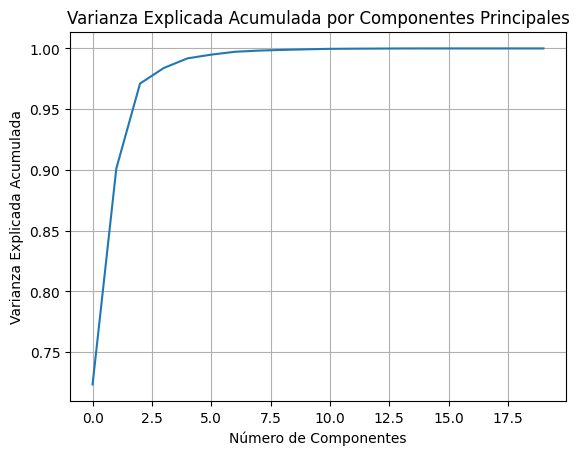

In [34]:
# AUNQUE LA MANERA MAS FACIL DE OBTENERLOS ES EN UNA GRAFICA
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()

# SIGUIENDO LA REGLA DEL CODO, PODRIAMOS VER QUE A PARTIR DE 2 COMPONENTES, ESTAS EXPLICANDO MAS DEL 95 POR CIENTO DE VARIANZA

In [35]:
# AUNQUE SI QUEREMOS ESTAR COMPLETAMENTE SEGUROS, HAY UN METODO QUE NO ES A OJO
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

num_componentes_90 = np.argmax(varianza_explicada_acumulada >= 0.9) + 1  # Encontrar el número de componentes necesarios para alcanzar el 90% de varianza explicada
#+1 porque el índice comienza en 0

print(f"Número de componentes para alcanzar el 90% de varianza explicada: {num_componentes_90}")

Número de componentes para alcanzar el 90% de varianza explicada: 2


In [36]:
# ASI QUE PODEMOS VOLVER A HACERLO, ESTA VEZ CON 2 COMPONENTES
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para visualización
componentes_principales = pca.fit_transform(calidad_sin_target)
# Y YA TENEMOS LOS COMPONENTES PRINCIPALES, PODEMOS EMPEZAR A ANALIZAR DATOS Y TENDENCIAS

In [37]:
# EMPEZARE CREANDO UN DATAFRAME CON MIS PRINCIPAL COMPONENTES DEL DATASET DE CALIDAD
componentes = pd.DataFrame(componentes_principales).rename(columns={0: 'PC1', 1: 'PC2'})
componentes

,PC1,PC2
0,20.873888,6.459640
1,16.517385,-5.861633
2,33.872266,2.291593
3,-6.983967,2.500740
4,1.034368,-9.980941
...,...,...
7991,-13.443217,5.672153
7992,-14.564640,-10.828574
7993,-15.620958,6.447034
7994,-16.734421,3.332056


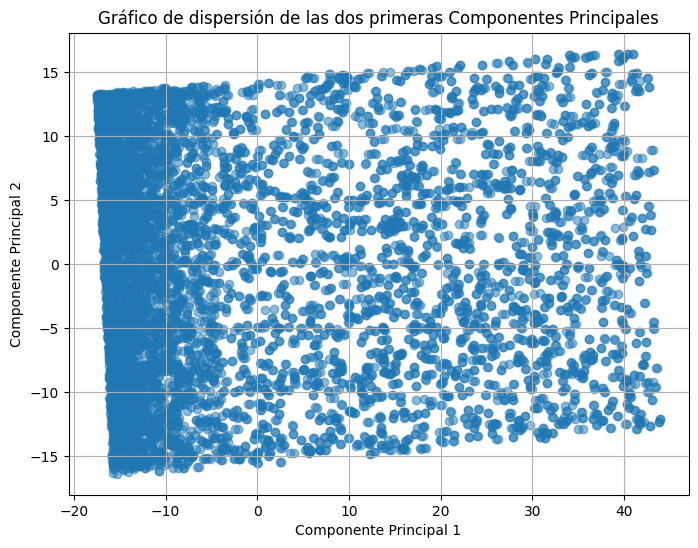

In [38]:
# Y AHORA REPRESENTAMOS
plt.figure(figsize=(8, 6))
plt.scatter(componentes['PC1'], componentes['PC2'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de las dos primeras Componentes Principales')
plt.grid(True)
plt.show()
# ASI NO PUEDO VER LA RELACION ENTRE LAS FEATURES Y LOS COMPONENTES

In [39]:
# para poder ver la relacion entre mis features originales (aluminio, amoniaco...) y mis componentes, 
# usamos los loadings o coeficientes  y creamos un heatmap
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) # se calculan multiplicando las matrices de los componentes principales por la matriz de datos centrados reducidos

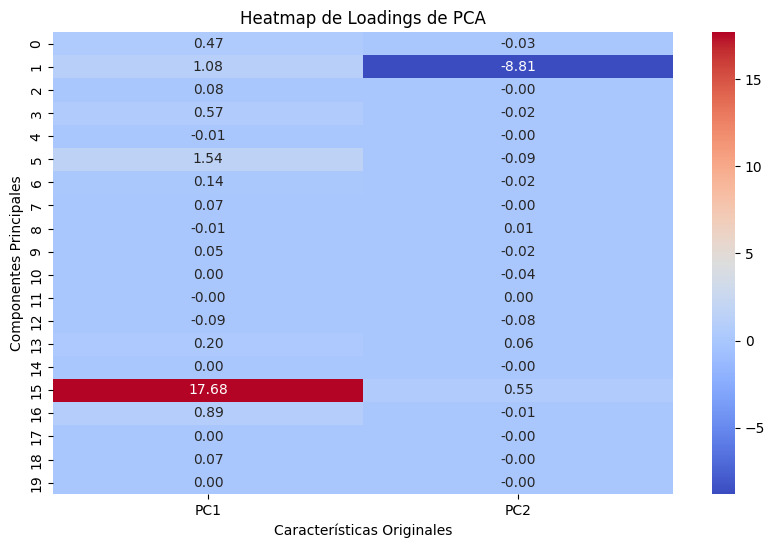

In [40]:
# Y REPRESENTAMOS
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=componentes.columns)
plt.title('Heatmap de Loadings de PCA')
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.show()

PRIMERAS CONCLUSIONES
1.	Las características con cargas altas (positivas o negativas) en los componentes principales son las que más influyen en la variabilidad del conjunto de datos. En mis datos, parece que una característica tiene una carga alta positiva (17.68), EL PERCLORATO en PC1, mientras que otra característica tiene una carga alta negativa (-8.81), EL AMONIACO, en PC2.
2.	Características irrelevantes: La mayoría de las características tienen cargas bajas en ambos componentes principales, lo que sugiere que no contribuyen significativamente a la variabilidad. Puedes considerar eliminar estas características si buscas simplificar tu modelo, LA ELIMINAREMOS PARA LOS CLUSTER
3.	Correlaciones: Si dos características tienen cargas similares en los mismos componentes principales, podrían estar correlacionadas. Esto podría indicar que están relacionadas de alguna manera en tu conjunto de datos original (ejemplo, el componente 7 el 18, AUNQUE SON TAN POCO SIGNIFICATIVAS QUE NO MERECE LA PENA ESTUDIARLAS EN PRINCIPIO)
4. Relación entre PC1 y PC2:Dado que estas dos características tienen cargas significativas en diferentes componentes principales, podrían estar relacionadas de alguna manera. Puede ser interesante explorar si hay alguna correlación entre el perclorato y el amoníaco en tu conjunto de datos original.
LA EXPLICACION DE PC1 PODRIA ENTENDERSE COMO ALTO PERCLORATO Y PC2 COMO BAJO AMONIACO
SEGUIRE INVESTIGANDO. PLANTEARSE SI ALGUNA PRUEBA ESPECIFICA PODRIA FUNCIONAR.


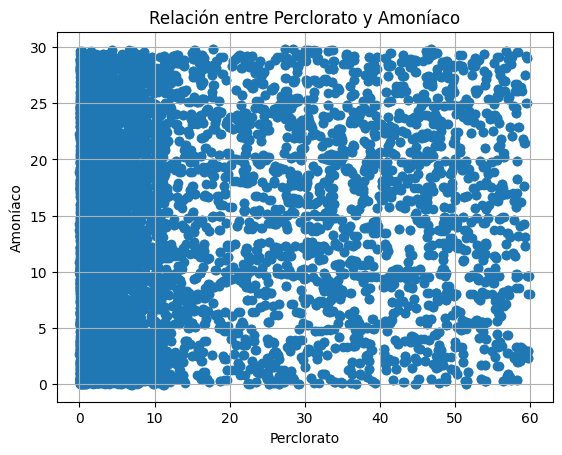

In [41]:
# Creo gráfico de dispersión para comparar ambas features
plt.scatter(calidad_sin_target['perchlorate'],calidad_sin_target['ammonia'])
plt.xlabel("Perclorato")
plt.ylabel("Amoníaco")
plt.title("Relación entre Perclorato y Amoníaco")
plt.grid(True)
plt.show()
# en principio, no se ve ninguna relacion entre los datos de ambas.

In [42]:
calidad_sin_target.corr(numeric_only=True) # no parece tampoco que hay ninguna correlacion.

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,-0.071040,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,0.105856,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,0.011596,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,-0.002429,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,0.021255,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,0.003432,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,0.002193,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,0.006183,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,0.018261,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,0.618535,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077


In [43]:
# ya puedo reducir la dimensionalidad y crear clusters, que seran mas significativos. 
# VAMOS A ELIMINAR TODAS LAS FEATURES CUYA RELACION CON AMBOS COMPONENTES de la PCA SEA POR DEBAJO DE 0,1
# LA 2, LA 4,LA 7, LA 8,LA 9, LA 10, LA 11,LA 12, LA 14, 17,18,19 LAS ELIMINAMOS y nos quedamos con las mas relevantes
columnas_a_borrar = [2, 4, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19]
calidad_filtrada = calidad_sin_target.drop(columns=calidad_sin_target.columns[columnas_a_borrar])

In [44]:
calidad_filtrada # y ya podemos hacer clusters

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium
0,1.65,9.08,2.85,0.35,0.83,1.13,37.75,6.78
1,2.32,21.16,3.31,5.28,0.68,1.93,32.26,3.21
2,1.01,14.02,0.58,4.24,0.53,1.11,50.28,7.07
3,1.36,11.33,2.96,7.23,0.03,1.29,9.12,1.72
4,0.92,24.33,0.20,2.67,0.69,1.11,16.90,2.41
...,...,...,...,...,...,...,...,...
7994,0.05,7.78,1.95,0.10,0.03,1.00,3.57,2.13
7995,0.05,24.22,0.59,0.45,0.02,1.00,1.48,1.11
7996,0.09,6.85,0.61,0.05,0.05,1.00,1.35,4.84
7997,0.01,10.00,2.00,2.00,0.00,0.00,0.00,0.00


In [45]:
# vamos a normalizar primero
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
calidad_normalizada = scaler.fit_transform(calidad_filtrada)
calidad_filtrada = pd.DataFrame(calidad_normalizada, columns=calidad_filtrada.columns)

c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\skle

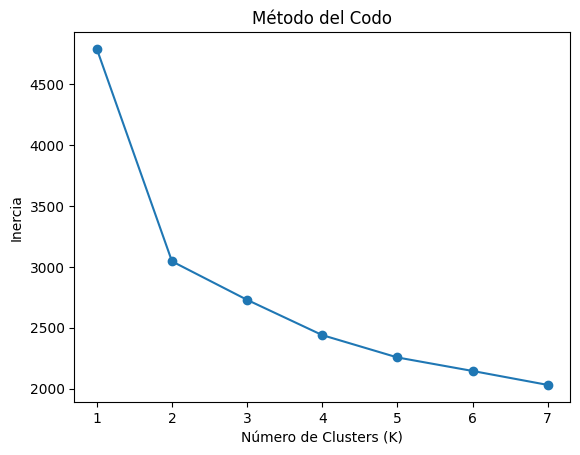

In [46]:
from sklearn.cluster import KMeans
inercia = [] # CREAMOS UNA LISTA VACIA, DONDE IREMOS INTRODUCIENDO LOS VALORES DE INERCIA
for k in range(1, 8):  # Probamos desde 1 hasta 7 clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(calidad_filtrada)
    inercia.append(kmeans.inertia_)

# Y VISULIZAMOS
plt.plot(range(1, 8), inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [47]:
# parece que el codo se forma a partir del cluster 2, pero haremos silhoutte para ver si tenemos mas informacion

c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

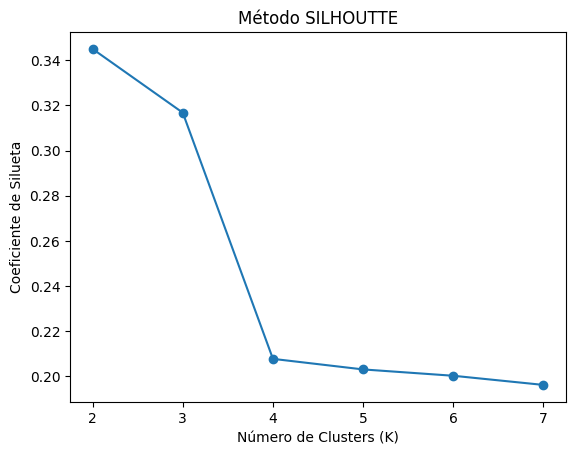

In [48]:
from sklearn.metrics import silhouette_score

coeficientes_silueta = [] # CREAMOS LISTA VACIA PARA LOS DISTINTOS COEFICIENTES DE SILUETA
for k in range(2, 8):  # Probamos desde 2 hasta 7 clusters
    kmeans = KMeans(n_clusters=k)
    etiquetas = kmeans.fit_predict(calidad_filtrada)
    coeficiente_silueta = silhouette_score(calidad_filtrada, etiquetas)
    coeficientes_silueta.append(coeficiente_silueta)

# Y DIBUJAMOS
plt.plot(range(2, 8), coeficientes_silueta, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método SILHOUTTE')
plt.show()
# y efectivamente, el punto mas alto serian 2 clusters, de modo que es lo que haremos aunque parezcan pocos

In [49]:
# segun silhoutte, cogemos 2 clusters
kmeans_calidad = KMeans(n_clusters=2)  # incluimos los 2 clusters
clusters_calidad = kmeans_calidad.fit_predict(calidad_filtrada)

c:\Users\Picar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [80]:
# Guarda el modelo entrenado en un archivo
import pickle
with open('kmeans_model_calidad.pkl', 'wb') as file:
    pickle.dump(kmeans_calidad, file)

Cluster 0:
         aluminium      ammonia       barium   chloramine     chromium  \
count  4187.000000  4187.000000  4187.000000  4187.000000  4187.000000   
mean      0.013854     0.444019     0.178532     0.030405     0.065021   
std       0.040977     0.296859     0.155459     0.064843     0.067817   
min       0.000000     0.002674     0.000000     0.000000     0.000000   
25%       0.005941     0.180816     0.066802     0.005760     0.033333   
50%       0.009901     0.420789     0.137652     0.011521     0.055556   
75%       0.015842     0.699365     0.228745     0.033410     0.088889   
max       0.952475     0.998663     0.987854     0.870968     0.888889   

          nitrites  perchlorate       radium  cluster  
count  4187.000000  4187.000000  4187.000000   4187.0  
mean      0.368187     0.062521     0.227110      0.0  
std       0.213557     0.069645     0.220122      0.0  
min       0.000000     0.000000     0.000000      0.0  
25%       0.184300     0.011331     0.0613

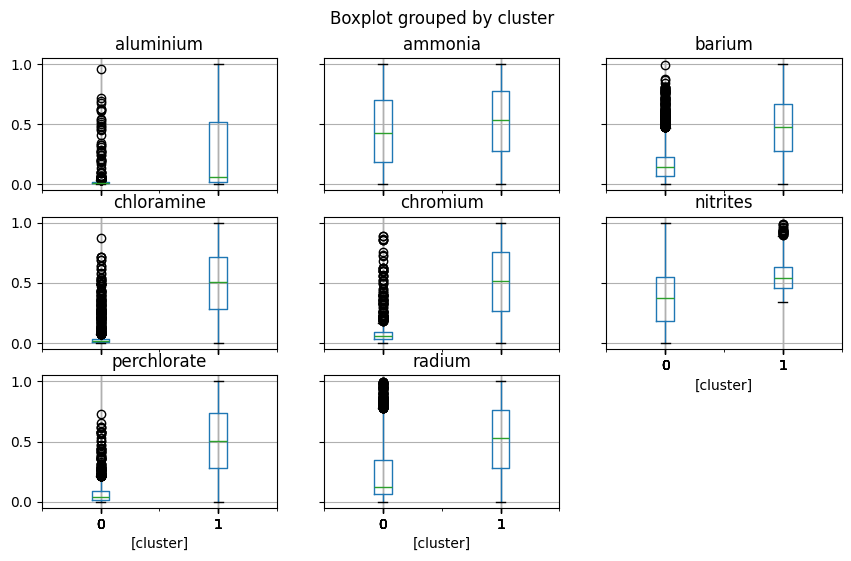

In [50]:
# AHORA, VAMOS A ANALIZAR LOS CLUSTERS QUE HEMOS CREADO PARA EL DATASET DE CALIDAD, A VER SI ENCONTRAMOS RELACIONES SIGNIFICATIVAS.
# PARA PODER HACERLO, CREARE UNA COLUMNA EN MI DATASET, DE CALIDAD Y AÑADIRE LAS ETIQUETAS de los cluster
calidad_clusterizada = calidad_filtrada.copy()  # hago una copia
calidad_clusterizada['cluster'] = clusters_calidad# asi, tenemos las etiquetas de los cluster en cada columna

grouped_data1 = calidad_clusterizada.groupby('cluster') # es necesario agrupar, SI NO, NO VERIAMOS LOS GRUPOS

for cluster, group in grouped_data1: # PARA VER LAS CARACTERISTICAS
    print(f"Cluster {cluster}:")
    print(group.describe())
    print("\n")

#  SI QUIERO VERLO EN GRAFICOS, un boxplot de cada característica por cluster:
calidad_clusterizada.boxplot(by='cluster', figsize=(10, 6))
plt.show()

Sustancias químicas: El gráfico representa ocho sustancias químicas diferentes: aluminio, amoníaco, cloramina, cromo, nitrItos, perclorato, radio y bario.
Clusters: Los datos se agrupan en dos clusters (0 y 1). Cada boxplot muestra la distribución de las sustancias en estos dos clusters.
Boxplots: Cada boxplot representa la variabilidad de una sustancia química específica en los dos clusters. Los valores en el eje Y varían de 0 a 1.0.
Observaciones:
Los puntos fuera del rango intercuartílico pueden indicar posibles outliers.
No se observa una clara separación entre los clusters, lo que sugiere que las sustancias químicas no se agrupan fuertemente en este análisis.
En resumen, este gráfico muestra cómo las sustancias químicas se distribuyen en dos clusters según el algoritmo KMeans. Sin embargo, la falta de una separación clara podría requerir una exploración más profunda para comprender las características de cada cluster y su significado en el contexto de las sustancias químicas analizadas1.

# en el cluster 0 parece que hay muchos mas outliers que en el 1.
En el cluster 0 parece que hay muchos mas outliers que en el 1.
Parece que el Cluster 0 tiene más puntos fuera del rango intercuartílico (outliers) en comparación con el Cluster 1. Esto podría deberse a varias razones:
-Distribución de datos: La distribución de los datos en el Cluster 0 puede ser más dispersa o tener una mayor variabilidad en comparación con el Cluster 1. El cluster 1 podría tener una estructura más clara en comparación con el otro. Los pocos outliers podrían indicar que la mayoría de los puntos de datos en este cluster siguen un patrón similar y están más cerca unos de otros en el espacio de características
-Densidad de puntos: Si el Cluster 0 tiene una mayor densidad de puntos en ciertas áreas, es más probable que algunos de esos puntos se encuentren fuera del rango intercuartílico.
-Características específicas: Las sustancias químicas representadas pueden tener características particulares que afectan su distribución en los clusters. Por ejemplo, algunas sustancias pueden ser más propensas a valores extremos debido a su naturaleza química.
-Parámetros del algoritmo KMeans: Los resultados también pueden depender de los parámetros utilizados en el algoritmo KMeans, como el número de clusters o la inicialización de centroides.
En resumen, la presencia de outliers en el Cluster 1 podría indicar que este grupo de sustancias químicas tiene una mayor variabilidad o una distribución menos uniforme en comparación con el Cluster 0. Para obtener una comprensión más profunda, sería necesario analizar las características específicas de las sustancias químicas y ajustar los parámetros del algoritmo según sea necesario.

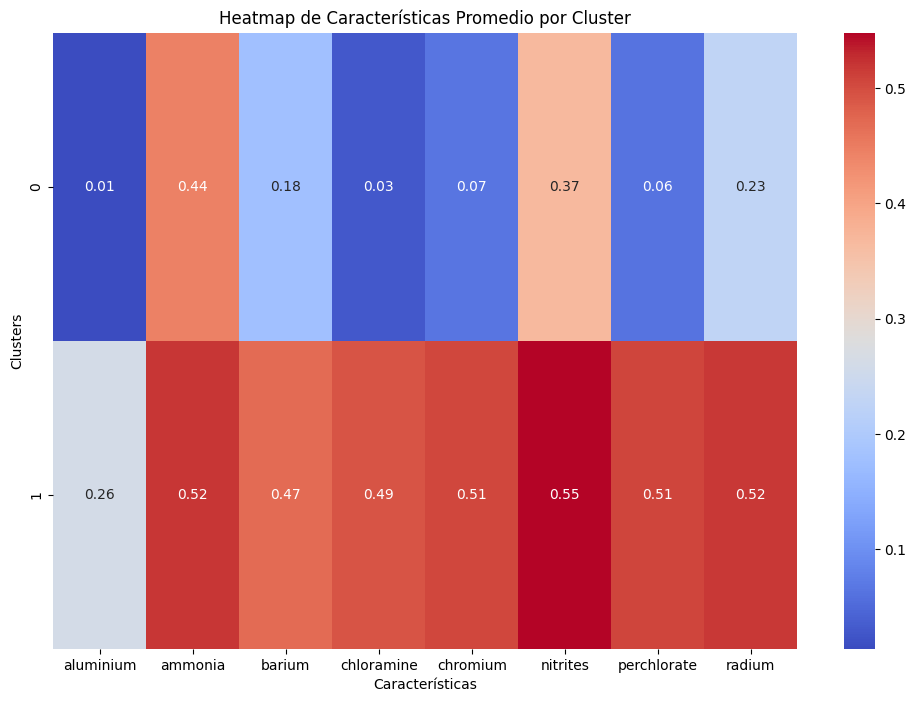

In [51]:
# Podemos representarlo con un heatmap, PARA VERLO MAS CLARO
calidad_media = calidad_clusterizada.groupby('cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(calidad_media, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de Características Promedio por Cluster')
plt.xlabel('Características')
plt.ylabel('Clusters')
plt.show()

En base al mapa de calor, podemos observar que los nitritos están MUY relacionados con el Cluster 1, es la feature que destaca. Esto significa que la concentración o presencia de nitritos tiende a ser más alta en ese cluster específico. Sin embargo, en el segundo cluster tambien esta en concentracion bastante alta comparado con el resto de features (a excepcion del amoniaco, que tambien es muy alto en el cluster 1)
Si queremos sacar una conclusion inicial (aunque siempre a espera de otras pruebas), podriamos estudiar que relacion
hay entre nitritos y amoniaco que las hace tan representativas en ambos clusters.
- Amoníaco (NH₃):
El amoníaco es una sustancia química que se encuentra en el agua, especialmente en acuarios y sistemas acuáticos.
Se origina a partir de desechos de peces, alimentos no consumidos y materia orgánica en descomposición.
El amoníaco es tóxico para los peces, especialmente en concentraciones más altas.
- Nitritos (NO₂-):
Los nitritos son productos intermedios en el ciclo del nitrógeno.
Se forman a partir de la oxidación del amoníaco por bacterias nitrificantes.
Los nitritos también son tóxicos para los peces, aunque en menor medida que el amoníaco.
Relación:
El amoníaco y los nitritos están relacionados porque el amoníaco se convierte en nitritos durante el proceso de nitrificación.
Las bacterias nitrificantes convierten el amoníaco en nitritos y luego en nitratos (NO₃-).
En un acuario o sistema acuático, controlar los niveles de amoníaco y nitritos es esencial para mantener un ambiente saludable para los peces y otras formas de vida acuática.
En resumen, ambos compuestos están relacionados en el ciclo del nitrógeno y afectan la calidad del agua. Mantener bajos los niveles de amoníaco y nitritos es fundamental para la salud de los organismos acuáticos

### CONCLUSION 2:
Si en uno de los clusters todas las características, excepto el aluminio, son muy representativas, mientras que en el otro solo destaca el nitrato y el amoniaco, esto sugiere diferencias significativas en la composición de los clusters y posiblemente en las condiciones o características asociadas a cada grupo de muestras. Aquí hay algunas interpretaciones posibles:

- Cluster con múltiples características significativas: El cluster donde todas las características, excepto el aluminio, son muy representativas puede ser más diverso en términos de la composición química del agua. Esto podría indicar una variedad de contaminantes o factores que están presentes en diferentes concentraciones en estas muestras.

- Cluster con un único contaminante destacado: El cluster donde solo destacan el nitrato y el amoniaco puede representar un grupo específico de muestras que están influenciadas principalmente por estos contaminantes en particular. Esto podría sugerir una fuente común de contaminación o condiciones ambientales que favorecen la presencia de nitratos y amoniaco en estas muestras.

### PRUEBAS FUTURAS
- Enfoque en las Sustancias Clave:
Dado que estas sustancias son consistentes en ambos clusters, podríamos centrarnos en ellas durante el análisis y el monitoreo del agua.
- Realizar pruebas específicas para estas sustancias podría proporcionar información valiosa sobre la calidad del agua y posibles áreas de mejora.
Optimización y Control:
- Si estas sustancias son problemáticas (por ejemplo, si están por encima de los límites permitidos), podríamos implementar medidas específicas para reducir su presencia.
- Monitorear regularmente estas sustancias nos ayudaría a controlar y optimizar la calidad del agua.
- Análisis adicional: Realizar un análisis más detallado de las muestras en cada cluster, así como investigar las condiciones ambientales y los posibles orígenes de la contaminación, puede proporcionar más información sobre las diferencias entre los clusters y sus implicaciones para la calidad y potabilidad del agua.

# medidas
Cluster 1:
Características más altas: Este cluster tiene valores más altos en todas las características (aluminium, ammonia, barium, chloramine, chromium, nitrites, perchlorate, radium).
Medidas iniciales:
Investigar la fuente de estas sustancias químicas.
Realizar pruebas específicas para determinar la causa subyacente.
Implementar tratamientos o filtración para reducir los niveles si es necesario.
Cluster 0:
Valores más bajos: Este cluster muestra valores más bajos en todas las características.
Medidas iniciales:
Monitorear regularmente para detectar cualquier cambio.
Asegurarse de que los valores sigan dentro de los límites seguros.

# con respecto a nuestras dos sustancias mas importantes (amoniaco y nitritos), pruebas especificas
Para medir los niveles de nitritos y amoníaco en el agua, existen varias opciones de pruebas. Aquí te presento algunas alternativas:

Test Kit de Nitritos NO2-N (0,0 a 1,0 mg/L):
Este kit utiliza el método del ácido cromotrópico para medir los nitritos.
Viene con todos los reactivos y equipos necesarios para realizar aproximadamente 100 pruebas.
Precio: 52,00€ (Sin IVA)1.
Checker Nitritos:
Estos medidores de bolsillo digitales (HI707 y HI708) permiten realizar pruebas de nitritos.
Se suministran con cubetas con tapa, reactivo para 6 tests, batería e instrucciones.
Precio: 67,00€ (Sin IVA)2.
Kit de Prueba para Control de Nitrificación:
Incluye un colorímetro DR 900 y reactivos para amoníaco libre, monocloramina, nitrito y cloro total.
Útil para la monitorización rutinaria de parámetros de calidad del agua en sistemas de agua clorada3.

In [52]:
# PODEMOS VER EL CLUSTER UNO si quiero ver que datos estan dentro DE UN CLUSTER.
labels = pd.Series(kmeans_calidad.labels_, index=calidad_filtrada.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data = pd.concat([calidad_filtrada, labels], axis=1)
cluster_0 = clustered_data[clustered_data['cluster'] == 0] # Filtramos los datos en el cluster 0

In [53]:
cluster_0.describe()
# TAMBIEN HABRIA QUE INTENTAR VER CON LA VARIABLE TARGET SI ESTA CONTAMINADO O NO, Y SACAR CONCLUSIONES
# POR EJEMPLO, SI UNA PRUEBA DE NITRITOS SOBRE EL AGUA PUEDE SER RELEVANTE.

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,cluster
count,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.0
mean,0.013854,0.444019,0.178532,0.030405,0.065021,0.368187,0.062521,0.227110,0.0
std,0.040977,0.296859,0.155459,0.064843,0.067817,0.213557,0.069645,0.220122,0.0
min,0.000000,0.002674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.005941,0.180816,0.066802,0.005760,0.033333,0.184300,0.011331,0.061327,0.0
50%,0.009901,0.420789,0.137652,0.011521,0.055556,0.372014,0.042660,0.125156,0.0
75%,0.015842,0.699365,0.228745,0.033410,0.088889,0.546075,0.091068,0.346683,0.0
max,0.952475,0.998663,0.987854,0.870968,0.888889,1.000000,0.729712,0.997497,0.0


In [54]:
# si queremos ver caracteristicas de cada cluster, PODEMOS AÑADIR LA COLUMNA TARGET AHORA Y VER SI HAY UNA RELACION EN LOS CLUSTER PARA LA CALIDAD
calidad_filtrada_con_target = calidad_filtrada.join(target_calidad)
calidad_filtrada_con_target

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,is_safe
0,0.326733,0.306150,0.576923,0.040323,0.922222,0.385666,0.629062,0.848561,1.0
1,0.459406,0.709893,0.670040,0.608295,0.755556,0.658703,0.537577,0.401752,1.0
2,0.200000,0.471257,0.117409,0.488479,0.588889,0.378840,0.837860,0.884856,0.0
3,0.269307,0.381350,0.599190,0.832949,0.033333,0.440273,0.151975,0.215269,1.0
4,0.182178,0.815842,0.040486,0.307604,0.766667,0.378840,0.281620,0.301627,1.0
...,...,...,...,...,...,...,...,...,...
7991,0.009901,0.262701,0.394737,0.011521,0.033333,0.341297,0.059490,0.266583,1.0
7992,0.009901,0.812166,0.119433,0.051843,0.022222,0.341297,0.024663,0.138924,1.0
7993,0.017822,0.231618,0.123482,0.005760,0.055556,0.341297,0.022496,0.605757,1.0
7994,0.001980,0.336898,0.404858,0.230415,0.000000,0.000000,0.000000,0.000000,1.0


In [55]:
# si quiero ver que datos estan dentro DE MI CLUSTER 0.
labels = pd.Series(kmeans.labels_, index=calidad_filtrada_con_target.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data = pd.concat([calidad_filtrada_con_target, labels], axis=1)
cluster_0 = clustered_data[clustered_data['cluster'] == 0] # Filtramos los datos en el cluster 0

In [56]:
cluster_0 # ya tenemos aqui el target, y a partir de aqui analizar

,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,is_safe,cluster
91,0.346535,0.461898,0.275304,0.021889,0.566667,0.423208,0.144143,0.873592,1.0,0
106,0.320792,0.221257,0.295547,0.353687,0.122222,0.348123,0.057824,0.785982,1.0,0
124,0.380198,0.662099,0.224696,0.215438,0.177778,0.453925,0.254958,0.600751,1.0,0
162,0.532673,0.136364,0.056680,0.093318,0.366667,0.576792,0.335611,0.982478,1.0,0
172,0.308911,0.218917,0.157895,0.392857,0.233333,0.460751,0.078654,0.826033,1.0,0
...,...,...,...,...,...,...,...,...,...,...
7986,0.001980,0.929479,0.155870,0.023041,0.033333,0.341297,0.126312,0.902378,1.0,0
7987,0.000000,0.106618,0.251012,0.006912,0.033333,0.341297,0.007665,0.780976,1.0,0
7990,0.003960,0.177807,0.155870,0.065668,0.044444,0.341297,0.027995,0.444305,0.0,0
7993,0.017822,0.231618,0.123482,0.005760,0.055556,0.341297,0.022496,0.605757,1.0,0


In [57]:
# y el cluster 1
labels = pd.Series(kmeans.labels_, index=calidad_filtrada_con_target.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data = pd.concat([calidad_filtrada_con_target, labels], axis=1)
cluster_1 = clustered_data[clustered_data['cluster'] == 1] # Filtramos los datos en el cluster 1

In [58]:
cluster_1


,aluminium,ammonia,barium,chloramine,chromium,nitrites,perchlorate,radium,is_safe,cluster
189,0.093069,0.744987,0.419028,0.046083,0.233333,0.607509,0.075154,0.063830,1.0,1
398,0.166337,0.747995,0.753036,0.201613,0.366667,0.494881,0.006666,0.342929,1.0,1
428,0.269307,0.588904,0.489879,0.253456,0.333333,0.662116,0.215464,0.051314,1.0,1
444,0.269307,0.946190,0.058704,0.072581,0.400000,0.518771,0.053824,0.143930,1.0,1
464,0.328713,0.636029,0.119433,0.326037,0.100000,0.460751,0.440260,0.239049,1.0,1
...,...,...,...,...,...,...,...,...,...,...
7947,0.005941,0.668449,0.443320,0.026498,0.000000,0.627986,0.173638,0.221527,0.0,1
7958,0.001980,0.800802,0.135628,0.046083,0.044444,0.692833,0.059323,0.265332,0.0,1
7970,0.007921,0.909091,0.103239,0.085253,0.077778,0.542662,0.104816,0.025031,0.0,1
7983,0.005941,0.676805,0.082996,0.009217,0.033333,0.341297,0.052491,0.520651,0.0,1


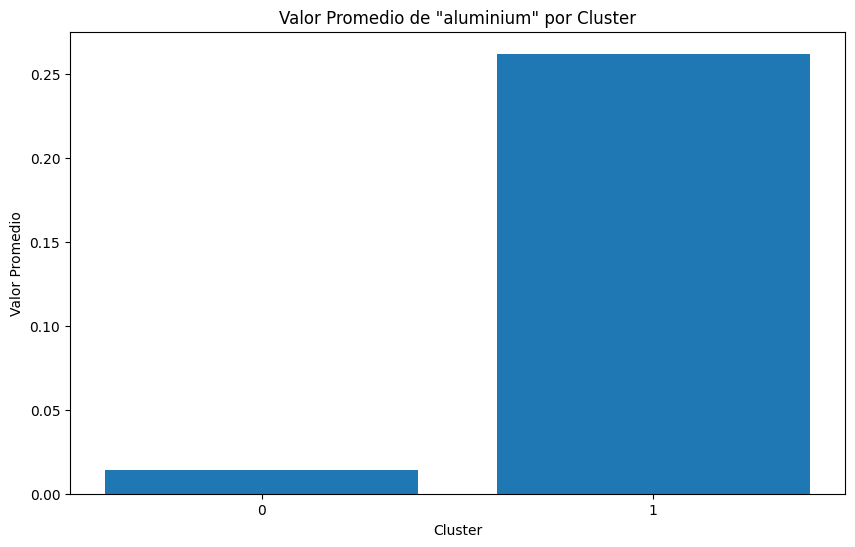

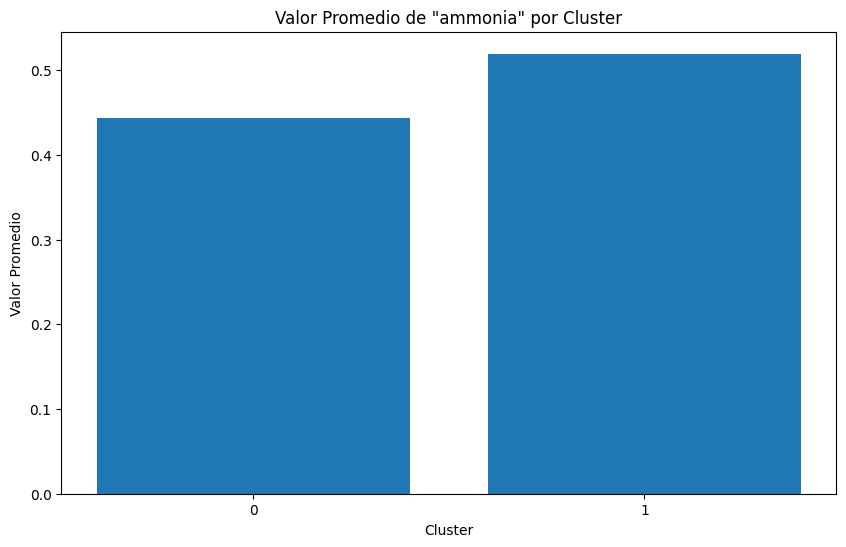

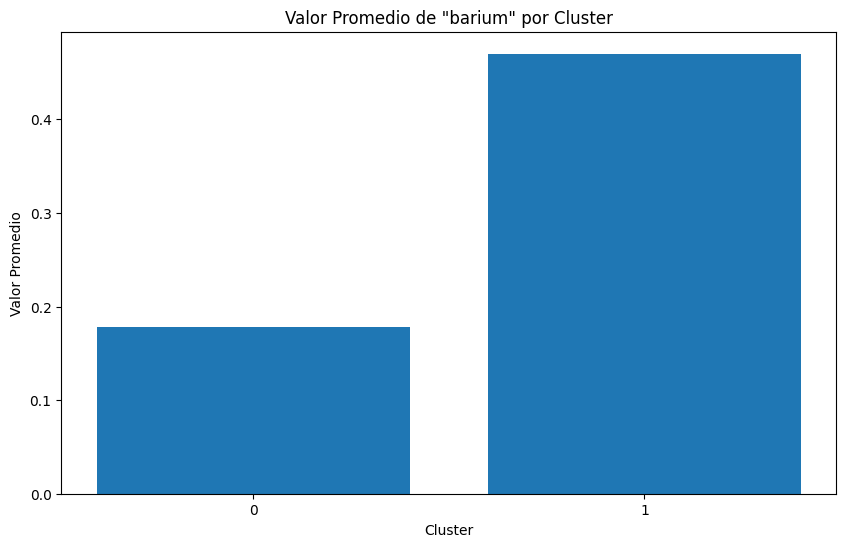

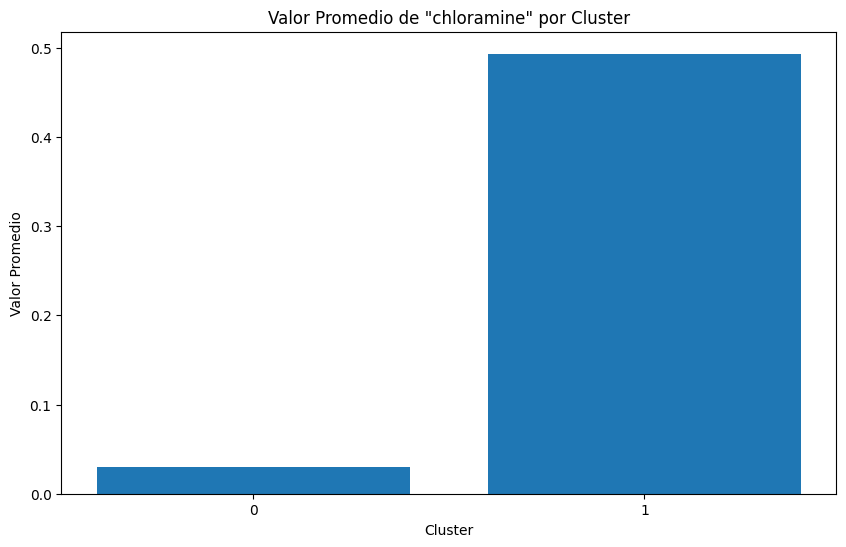

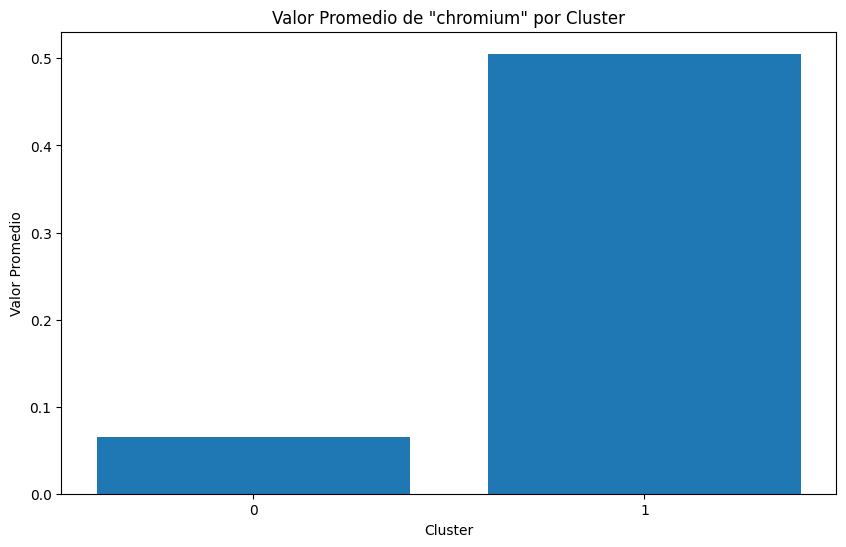

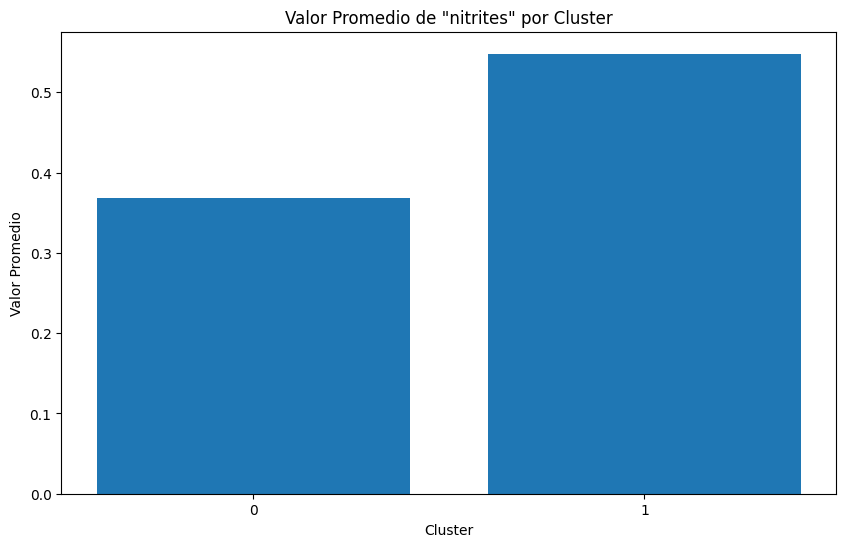

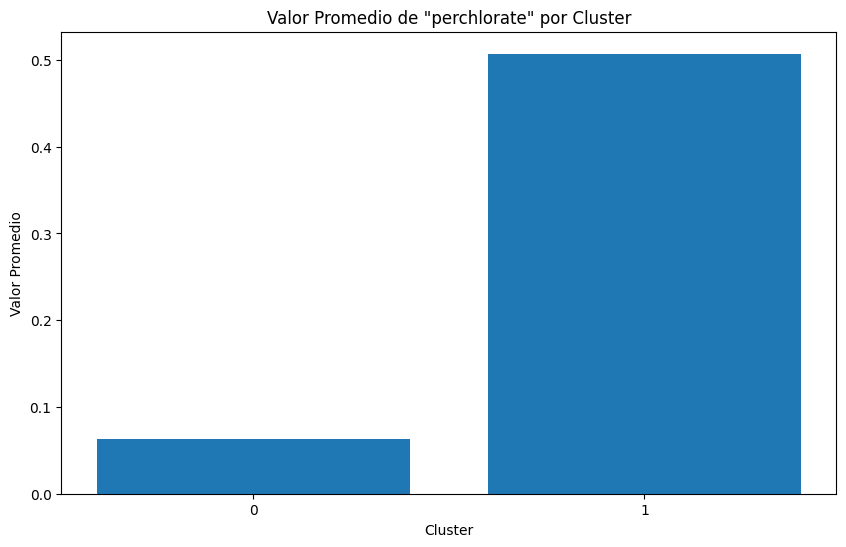

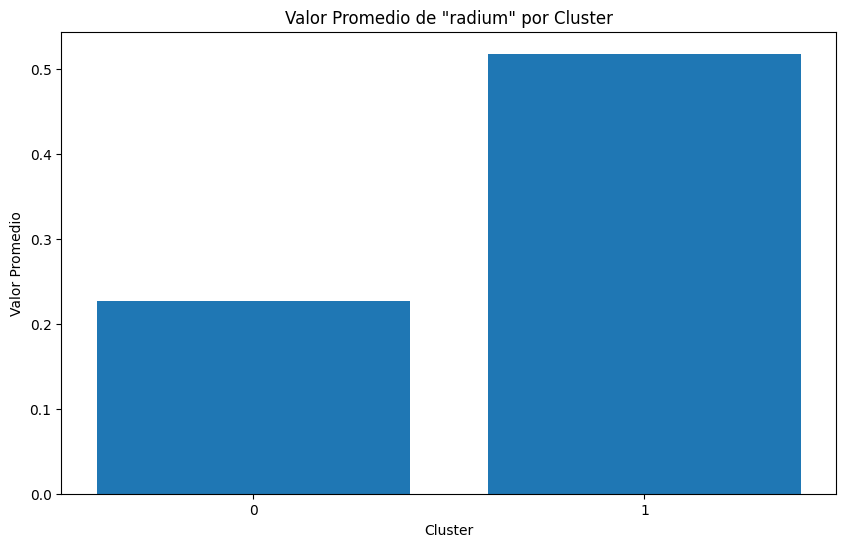

In [59]:
# si quiero ver el promedio de cada caracteristica por cluster
cluster_means = calidad_clusterizada.groupby('cluster').mean()
features = cluster_means.columns # las caracteristicas

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_means.index, cluster_means[feature])
    plt.xlabel('Cluster')
    plt.ylabel('Valor Promedio')
    plt.title(f'Valor Promedio de "{feature}" por Cluster')
    plt.xticks(cluster_means.index)  # Asegura que los ticks en el eje x representen los clusters
    plt.show()

In [60]:
# si lo quiero interactivo y en un solo grafico
import plotly.express as px

# Convertir el DataFrame de valores promedio por cluster a formato largo (long format)
cluster_means_long = cluster_means.reset_index().melt(id_vars='cluster', var_name='Feature', value_name='Valor Promedio')

# Crear el gráfico de barras utilizando Plotly Express
fig = px.bar(cluster_means_long, x='cluster', y='Valor Promedio', color='Feature', barmode='group',
             labels={'cluster': 'Cluster', 'Valor Promedio': 'Valor Promedio', 'Feature': 'Característica'},
             title='Valor Promedio de Características por Cluster')
fig.show()

In [61]:
# sin embargo, vemos que con los cluster que hemos cogido (2), SOLO MENOS DE 2000 DE LOS 8000 PERTENECEN A UNO DE LOS CLUSTER CREADOS.
# Puede deberse A LA CANTIDAD DE CLUSTER SELECCIONADOS (aunque nuestros metodos silhoutte y del codo determinaban que eran los optimos)
# o a los outliers, PODEMOS PROBAR O AUMENTAR LOS CLUSTER por si no tenemos grupos suficientes (AUNQUE NUESTRAS PRUEBAS DETERMINAN QUE NO SERIA NECESARIO) O
# USAR OTRO ALGORITMO MENOS SENSIBLE A OUTLIERS, como DBSCAN, Mean Shift Clustering O Clustering aglomerativo
# AREA DE MEJORA, EXPLORAR OTRO APRENDIZAJE NO SUPERVISADO PARA VER SI MAS DE NUESTRAS MUESTRAS NOS ENTRAN EN CADA CLUSTER,

In [62]:
# AHORA, VAMOS A CREAR CLUSTERS DIRECTAMENTE CON EL DATASET DE POTABILIDAD, no necesitamos hacer PCA ANTES PORQUE TIENE POCAS FEATURES.
# PERO DE NUEVO, CUANTOS CLUSTER HAGO QUE PUEDAN SER SIGNIFICATIVOS?puedo usar el metodo del codo como en PCA, O SILHOUTTE, COMO ANTES
# PROBARE AMBOS, A VER CUAL NOS DA MEJOR RESULTADOS

In [63]:
# LO PRIMERO, DEBO NORMALIZAR. ES UNA BUENA PRACTICA CON KMEANS, PARA QUE TODOS MIS DATOS ESTEN EN LA MISMA ESCALA.
# VOY A USAR MINMAX SCALER, PORQUE DESEO mantener la forma original de la distribución y
# Y no estoy segura de la distribución de tus datos, y asi manejo tambien mejor los outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
potabilidad_normalizada = scaler.fit_transform(potabilidad_sin_target)
potabilidad_sin_target = pd.DataFrame(potabilidad_normalizada, columns=potabilidad_sin_target.columns)

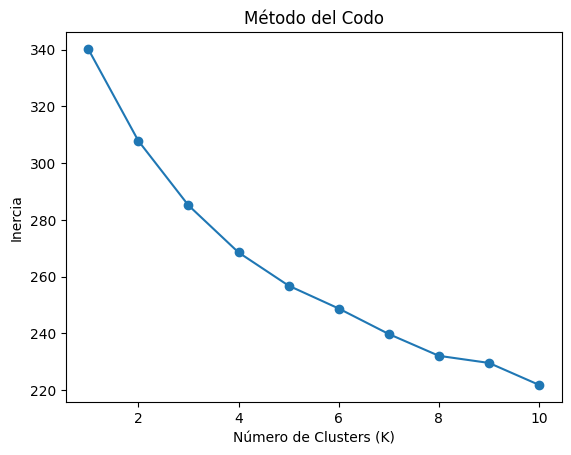

In [76]:
from sklearn.cluster import KMeans
inercia = [] # CREAMOS UNA LISTA VACIA, DONDE IREMOS INTRODUCIENDO LOS VALORES DE INERCIA
for k in range(1, 11):  # Probamos desde 1 hasta 12 clusters
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(potabilidad_sin_target)
    inercia.append(kmeans.inertia_)

# Y VISULIZAMOS
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [65]:
# Siguiendo este metodo, no hemos encontrado un codo muy claro, aunque vemos que se dobla a partir del 4 cluster.

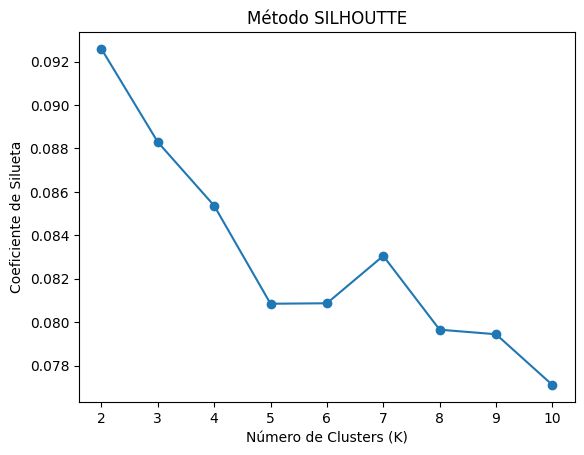

In [75]:
# Y AHORA EL SILHOUTTE
from sklearn.metrics import silhouette_score

coeficientes_silueta = [] # CREAMOS LISTA VACIA PARA LOS DISTINTOS COEFICIENTES DE SILUETA
for k in range(2, 11):  # Probamos desde 2 hasta 10 clusters
    kmeans = KMeans(n_clusters=k,n_init='auto')
    etiquetas = kmeans.fit_predict(potabilidad_sin_target)
    coeficiente_silueta = silhouette_score(potabilidad_sin_target, etiquetas)
    coeficientes_silueta.append(coeficiente_silueta)

# Y DIBUJAMOS
plt.plot(range(2, 11), coeficientes_silueta, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método SILHOUTTE')
plt.show()

In [74]:
# segun silhoutte, hay una pequeña subida en el cluster, lo que indica que puede ser una buena idea elegir 6.
# de todas formas, COMO PODEMOS CAMBIAR LOS CLUSTER SI ES NECESARIO, COGEREMOS 6 EN UN PRIMER MOMENTO
kmeans = KMeans(n_clusters=6,n_init='auto')  # incluimos los 6 clusters que hemos hablado
clusters = kmeans.fit_predict(potabilidad_sin_target)

In [79]:
with open('kmeans_model_potabilidad.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

Cluster 0:
               ph    Hardness      Solids  Chloramines     Sulfate  \
count  355.000000  355.000000  355.000000   355.000000  355.000000   
mean     0.507296    0.540031    0.331168     0.451797    0.585011   
std      0.104567    0.125975    0.107779     0.123579    0.101803   
min      0.087441    0.110584    0.018355     0.107149    0.291805   
25%      0.439843    0.455406    0.247626     0.373000    0.522000   
50%      0.498216    0.532680    0.326591     0.453398    0.586945   
75%      0.575462    0.611994    0.416799     0.527394    0.658260   
max      0.814830    1.000000    0.615175     0.826137    0.864834   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  cluster  
count    355.000000      355.000000       355.000000  355.000000    355.0  
mean       0.599901        0.488175         0.537359    0.519523      0.0  
std        0.093993        0.123111         0.114025    0.125548      0.0  
min        0.410381        0.155743         0.244101  

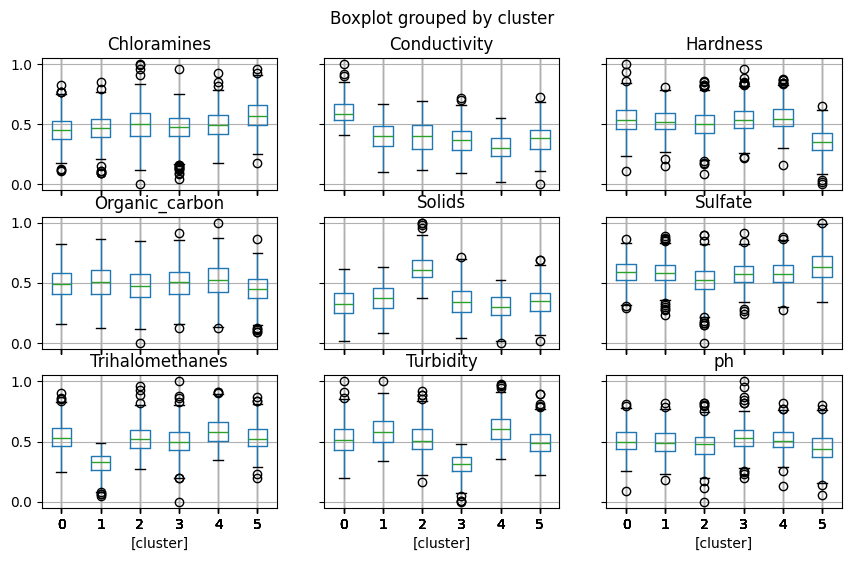

In [68]:
# AHORA, VAMOS A ANALIZAR LOS CLUSTERS QUE HEMOS CREADO PARA EL DATASET DE POTABILIDAD, A VER SI ENCONTRAMOS RELACIONES SIGNIFICATIVAS.
# PARA PODER HACERLO, CREARE UNA COLUMNA EN MI DATASET, DE POTABILIDAD Y AÑADIRE LAS ETIQUETAS de los cluster
potabilidad_clusterizada = potabilidad_sin_target.copy()  # hago una copia
potabilidad_clusterizada['cluster'] = clusters # asi, tenemos las etiquetas de los cluster en cada columna

grouped_data = potabilidad_clusterizada.groupby('cluster') # es necesario agrupar, SI NO, NO VERIAMOS LOS GRUPOS

for cluster, group in grouped_data: # PARA VER LAS CARACTERISTICAS
    print(f"Cluster {cluster}:")
    print(group.describe())
    print("\n")

#  SI QUIERO VERLO EN GRAFICOS, un boxplot de cada característica por cluster:
potabilidad_clusterizada.boxplot(by='cluster', figsize=(10, 6))
plt.show()

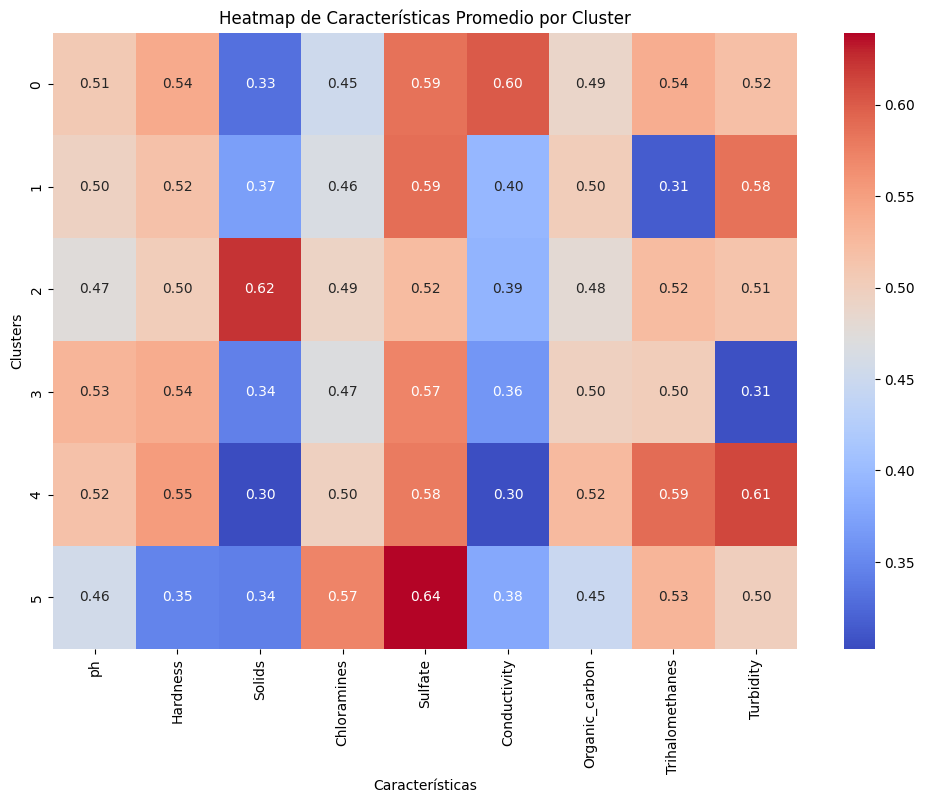

In [69]:
# Podemos representarlo con un heatmap, PARA VERLO MAS CLARO
potabilidad_media = potabilidad_clusterizada.groupby('cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(potabilidad_media, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de Características Promedio por Cluster')
plt.xlabel('Características')
plt.ylabel('Clusters')
plt.show()

### PRIMERAS CONCLUSIONES
CONCLUSIONES:
- Turbidez (Turbidity): El cluster 2 tiene la mayor turbidez (0.66), lo que sugiere que las muestras en este grupo pueden tener agua más turbia o con partículas en suspensión.
- Sulfato (Sulfate): El cluster 5 muestra una concentración notablemente alta de sulfato (0.63). Esto podría estar relacionado con la calidad del agua subterránea.
- Solids(solidos):El cluster 3 muestra una concentración notablemente alta de solidos (0.63). La característica “Sólidos” generalmente se refiere a la cantidad de partículas disueltas o suspendidas en el agua.
Un valor alto de sólidos podría indicar una mayor concentración de minerales, sedimentos o contaminantes en el agua.
- Balance General: En general, los valores están equilibrados en todos los clusters y características, sin valores atípicos extremos, excepto los mencionados anteriormente.

RESUMEN A SIMPLE VISTA:
Cluster 0:
Sólidos: Tiene una alta concentración promedio (0.63). Esto podría indicar una mayor presencia de sólidos disueltos en este cluster.
Conductividad: Tiene una concentración promedio relativamente alta (0.60). Esto sugiere que este cluster podría estar relacionado con una mayor conductividad eléctrica en el agua.
Turbidez: Aunque no es tan alto como los otros, aún muestra una turbidez notablemente alta (0.62). La turbidez se refiere a la claridad del agua y puede estar relacionada con partículas en suspensión.
Cluster 1:
pH: Tiene un valor promedio bajo (0.01). Esto podría indicar que el pH del agua en este cluster es más ácido.
Dureza: Tiene un valor promedio moderado (0.44). La dureza del agua está relacionada con la concentración de minerales como calcio y magnesio.
Cloraminas: Tiene un valor promedio bajo (0.18). Las cloraminas son compuestos químicos utilizados en el tratamiento del agua.
Carbono Orgánico: Tiene un valor promedio bajo (0.03). El carbono orgánico puede estar relacionado con la materia orgánica disuelta en el agua.
Trihalometanos: Tiene un valor promedio bajo (0.07). Los trihalometanos son subproductos de la desinfección del agua con cloro.
Nitritos: Tiene un valor promedio bajo (0.37). Los nitritos pueden estar relacionados con la contaminación del agua y la calidad del suministro.
Observaciones adicionales:
Los clusters parecen tener patrones similares para pH, dureza y sulfatos.
No hay un patrón claro o consistente para cloraminas y carbono orgánico.
En resumen, estos clusters representan diferentes perfiles químicos en el agua. El Cluster 0 parece estar relacionado con sólidos disueltos, conductividad y turbidez, mientras que el Cluster 1 muestra características más variadas. Es importante considerar estas relaciones al evaluar la calidad del agua y tomar decisiones sobre su tratamiento y uso.

## estudio mas exhaustivo
Cluster 0:
Este cluster tiene valores altos en pH, Hardness (dureza) y Conductivity (conductividad).
Podría estar relacionado con agua de mayor alcalinidad y dureza, posiblemente debido a minerales disueltos.
Cluster 1:
Muestra valores moderados en todas las características, excepto Trihalomethanes (trihalomethanos), que es relativamente bajo.
No hay una característica dominante en este cluster.
Cluster 2:
Destaca por tener un alto valor en Solids (sólidos), lo que sugiere una mayor concentración de partículas disueltas en el agua.
Cluster 3:
Tiene un valor alto en Sulfate (sulfato), pero no muestra una característica dominante adicional.
Cluster 4:
Valores altos, especialmente en Conductivity (conductividad) y Organic Carbon (carbono orgánico).
Podría estar relacionado con la presencia de materia orgánica y minerales disueltos.
Cluster 5:
Se caracteriza por tener el valor más alto en Turbidity (turbidez).
La turbidez podría estar relacionada con partículas en suspensión en el agua.

Basándonos en el mapa de calor y los diferentes clusters, podemos extraer algunas conclusiones y considerar medidas específicas para mejorar la calidad del agua:

MEDIDAS!!!

Cluster 0:
Alta dureza y conductividad: Podríamos considerar medidas para reducir la dureza del agua, como el uso de ablandadores de agua. Además, podríamos monitorear la conductividad para asegurarnos de que esté dentro de los límites seguros.
Cluster 1:
Valores moderados en todas las características: Aunque no hay una característica dominante, podríamos seguir monitoreando regularmente el agua para detectar cualquier cambio significativo.
Cluster 2:
Alta concentración de sólidos: Implementar sistemas de filtración o tratamiento para reducir los sólidos disueltos en el agua.
Cluster 3:
Alto sulfato: Monitorear el sulfato y considerar medidas para mantenerlo dentro de los límites aceptables.
Cluster 4:
Alta conductividad y carbono orgánico: Investigar la fuente de estas características y considerar tratamientos específicos si es necesario.
Cluster 5:
Alta turbidez: La turbidez puede afectar la claridad del agua. Filtrar o tratar el agua para reducir la turbidez podría ser beneficioso.
En resumen, cada cluster tiene sus propias características y desafíos. Las medidas específicas dependerán de la situación local, la fuente de agua y los objetivos de calidad. Es importante monitorear regularmente y ajustar las acciones según sea necesario para garantizar un suministro de agua seguro y saludable.

In [70]:
# Si quiero ver que datos estan dentro UN CLUSTER.
labels = pd.Series(kmeans.labels_, index=potabilidad_sin_target.index, name='cluster') # uso las etiquetas de mi kmeans
clustered_data1 = pd.concat([potabilidad_sin_target, labels], axis=1)
cluster_4_data = clustered_data1[clustered_data1['cluster'] == 4] # Filtramos los datos en el cluster 4

In [71]:
cluster_4_data # Y ANALIZAMOS CADA CLUSTER, importante SI QUEREMOS USAR LAS ETIQUETAS DEL ANTIGUO TARGET ELIMINADO, PODEMOS INCLUIRLAS AHORA


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,cluster
0,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,4
13,0.456483,0.513747,0.372060,0.620312,0.552782,0.383654,0.511958,0.617475,0.743523,4
15,0.504916,0.558276,0.264837,0.392277,0.594654,0.254642,0.230688,0.545480,0.721316,4
22,0.502325,0.677468,0.506686,0.462091,0.729981,0.236374,0.358498,0.498696,0.739896,4
23,0.703808,0.530356,0.171860,0.467904,0.591853,0.238476,0.875473,0.548042,0.642392,4
...,...,...,...,...,...,...,...,...,...,...
1985,0.681237,0.631033,0.398255,0.340365,0.526424,0.350016,0.596143,0.578418,0.566601,4
1992,0.438019,0.566349,0.325039,0.491135,0.601631,0.281806,0.233494,0.639287,0.783709,4
1996,0.520454,0.479752,0.395967,0.589575,0.468796,0.384778,0.447515,0.475063,0.701767,4
2000,0.468751,0.814529,0.332368,0.336170,0.589594,0.192316,0.724752,0.578960,0.744945,4


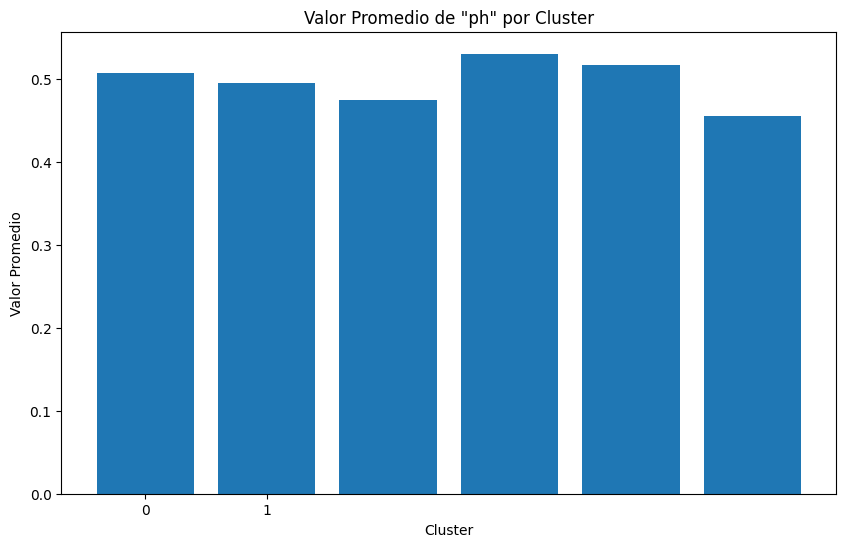

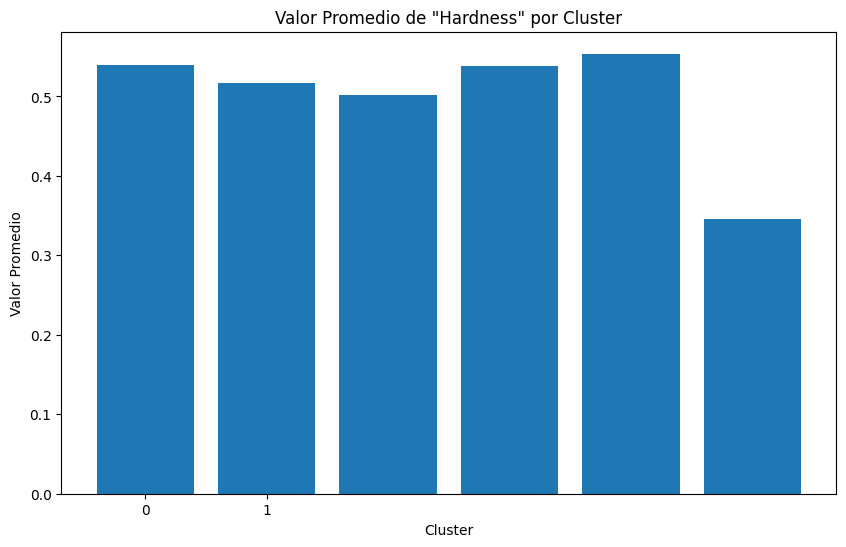

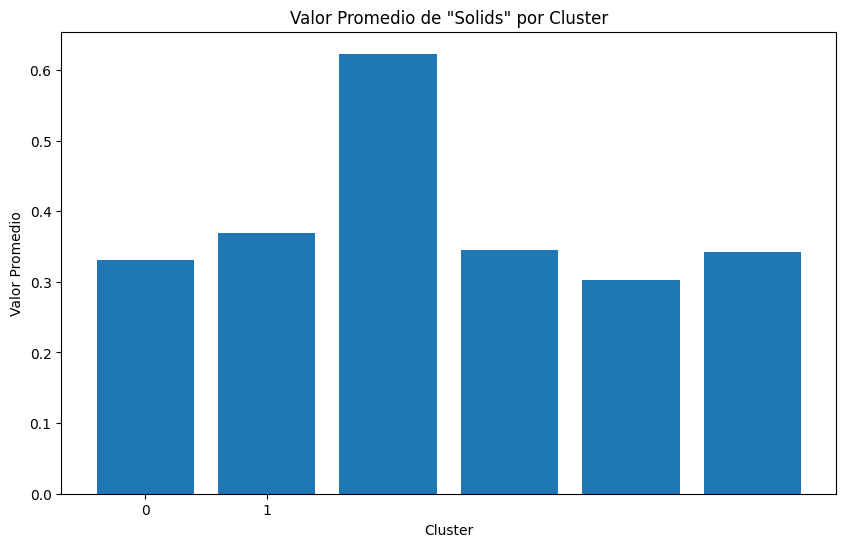

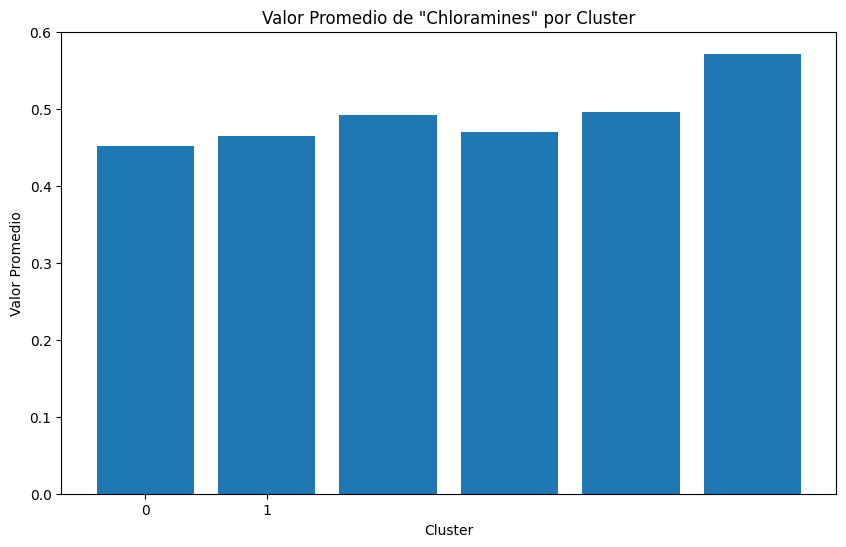

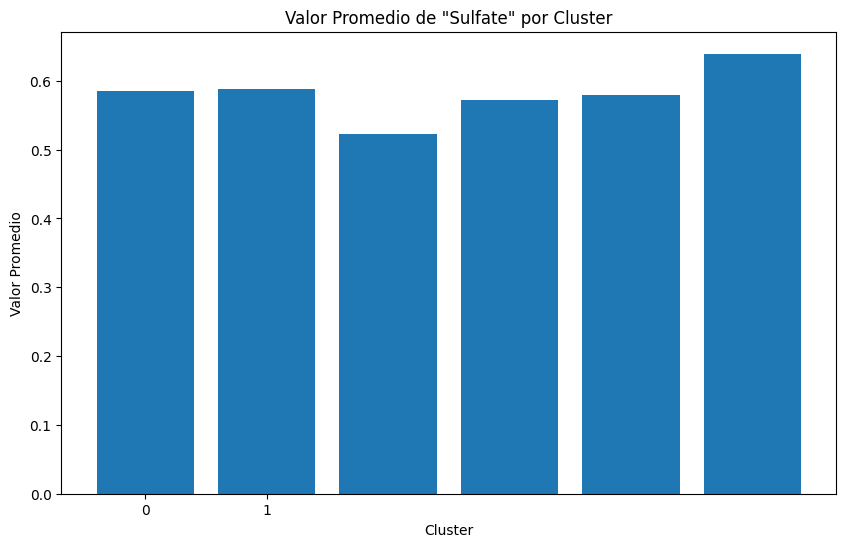

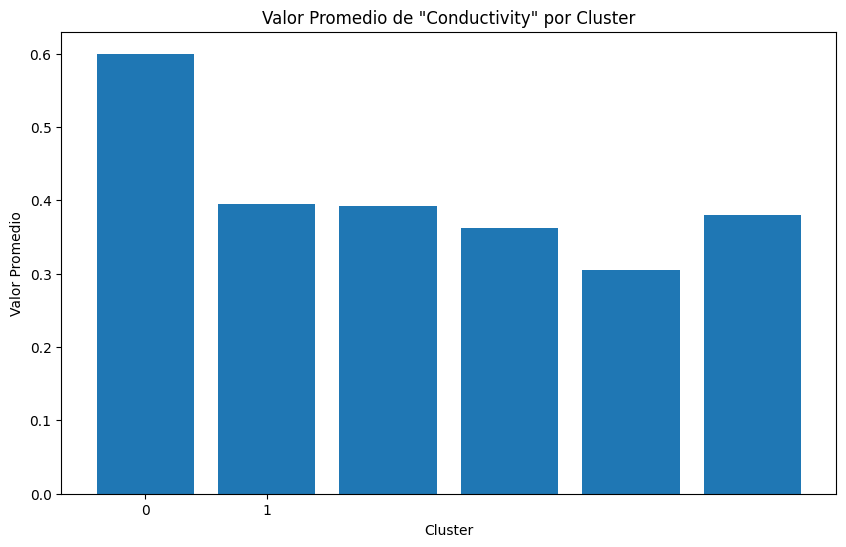

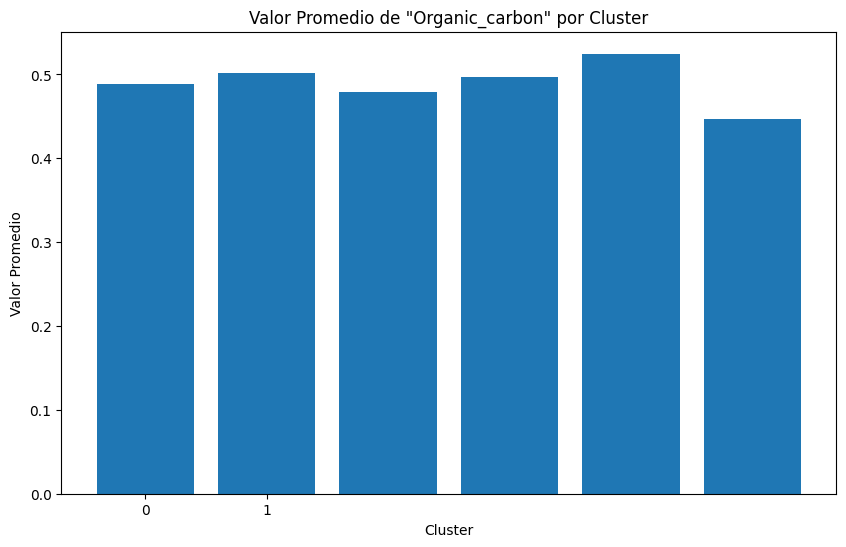

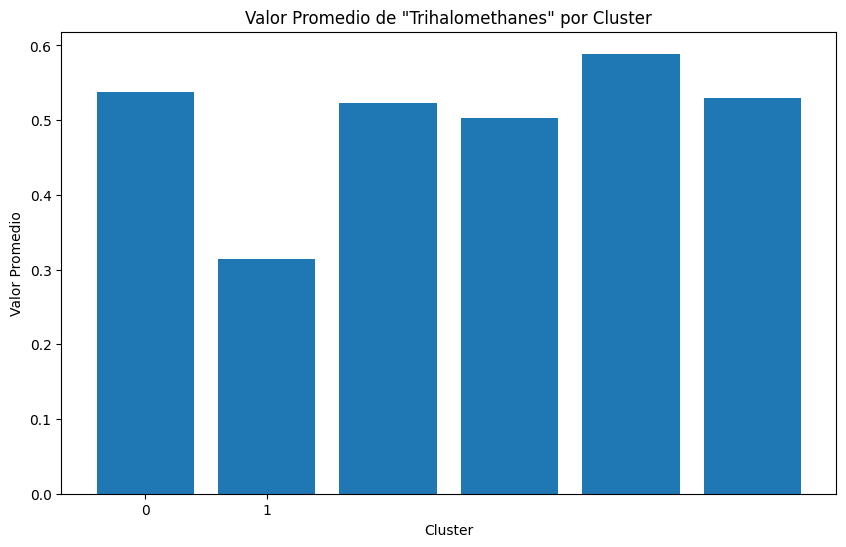

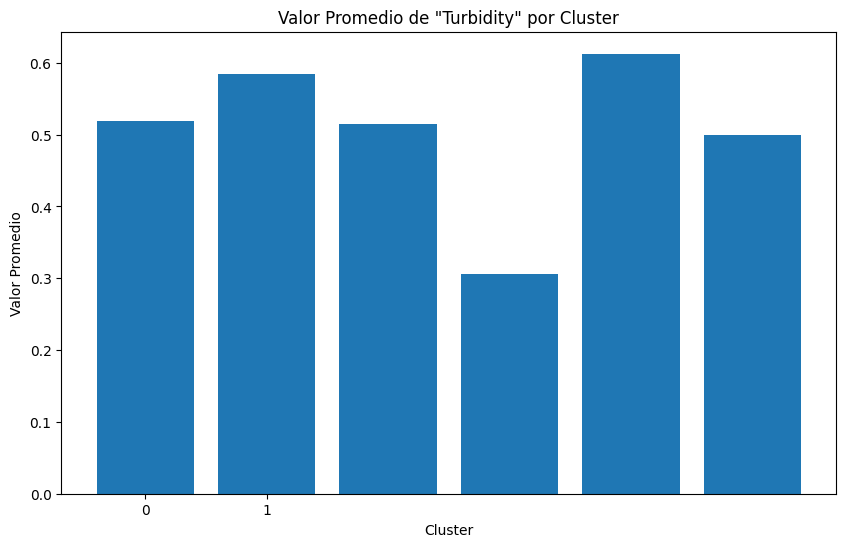

In [72]:
# Para representar la diferencia en la media en cada cluster de cada componente
cluster_means2 = potabilidad_media.groupby('cluster').mean()
features = cluster_means2.columns # las caracteristicas

# Crea un gráfico de barras para cada característica
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_means2.index, cluster_means2[feature])
    plt.xlabel('Cluster')
    plt.ylabel('Valor Promedio')
    plt.title(f'Valor Promedio de "{feature}" por Cluster')
    plt.xticks(cluster_means.index)  # Asegura que los ticks en el eje x representen los clusters
    plt.show()

In [73]:
# y en un solo grafico
# Convertir el DataFrame de valores promedio por cluster a formato largo (long format)
cluster_means_long = cluster_means2.reset_index().melt(id_vars='cluster', var_name='Feature', value_name='Valor Promedio')

# Crear el gráfico de barras utilizando Plotly Express
fig = px.bar(cluster_means_long, x='cluster', y='Valor Promedio', color='Feature', barmode='group',
             labels={'cluster': 'Cluster', 'Valor Promedio': 'Valor Promedio', 'Feature': 'Característica'},
             title='Valor Promedio de Características por Cluster')
fig.show()
